### Credit Card Fraud Detection



Introduction

In this project, we aim to build a machine learning model to detect fraudulent credit card transactions.

Credit card fraud is a major global concern, leading to billions of dollars in losses every year. Detecting fraudulent activity early is crucial for financial institutions to protect their customers and minimize financial risk. Machine learning techniques can help automate this detection by identifying hidden patterns and anomalies in transaction data.

We will perform the following steps in this notebook:
- Load and clean the dataset
- Explore and visualize the data
- Train and evaluate machine learning models


Let’s get started

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the necessary libraries

In [3]:
Data = pd.read_csv("creditcard_2023.csv")
Data.head()

# load the dataset

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
Data.isnull().sum().sum()

# check for missing values  

np.int64(0)

In [5]:
Data.duplicated().sum()

# check for duplicates values

np.int64(0)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
Data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

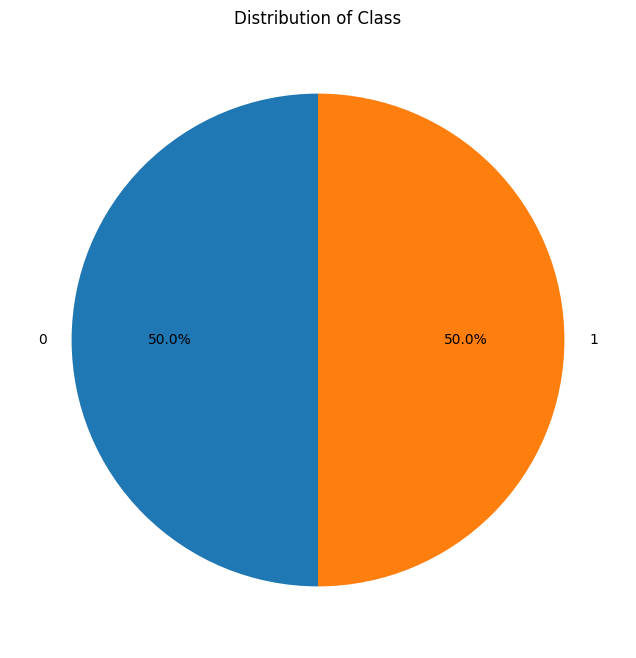

In [7]:
number = Data['Class'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(number, labels=number.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Class")
plt.show()

# explore the data with pie plot 

In [7]:
x = Data.drop(columns='Class',axis=1)
y = Data['Class']

In [8]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# split the data

In [ ]:
from sklearn.linear_model import LogisticRegression

Model = LogisticRegression()
Model.fit(x_train,y_train)

# train the model
y_pred = Model.predict(x_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(f""" Accuracy (LR): {accuracy * 100:.2f}%""")

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

 Accuracy (LR): 99.53%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     85149
           1       1.00      0.99      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



c:\Users\SHAKIL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.svm import SVC

# --- SVM Model ---
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)

y_pred_svm = svm_model.predict(x_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {svm_accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred_svm))

Accuracy (SVM): 99.92%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [12]:
# --- Decision Tree Model ---
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Decision Tree): {dt_accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred_dt))

Accuracy (Decision Tree): 99.96%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [14]:
from sklearn.ensemble import RandomForestClassifier

# --- Random Forest Model ---

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {rf_accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 99.98%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [10]:
from sklearn.neighbors import KNeighborsClassifier

# --- KNN Model ---
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {knn_accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred_knn))

Accuracy (KNN): 99.91%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [16]:
from xgboost import XGBClassifier

# --- XGBoost Model ---
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost): {xgb_accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred_xgb))

Accuracy (XGBoost): 99.98%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [12]:
from sklearn.ensemble import AdaBoostClassifier

# --- AdaBoost Model ---
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(x_train, y_train)

y_pred_ada = ada_model.predict(x_test)

ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy (AdaBoost): {ada_accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred_ada))

Accuracy (AdaBoost): 99.97%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# --- Gradient Boosting Model ---
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)

y_pred_gb = gb_model.predict(x_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy (Gradient Boosting): {gb_accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred_gb))

Accuracy (Gradient Boosting): 99.98%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

